In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt

In [5]:
class syntheticDataset(Dataset):
    def __init__(self, num_samples = 100, noise_std = 0.1):
        self.num_samples = num_samples
        self.noise_std = noise_std
        self.X = torch.linspace(-1,1,num_samples).reshape(-1,1)
        self.y = 2*self.X+1+torch.randn(self.X.size())*noise_std

    def __len__(self):
        return self.num_samples

    def __getitem__(self,idx):
        return self.X[idx], self.y[idx]

In [6]:
dataset = syntheticDataset(num_samples=100,noise_std=0.1)
# Print the first 5 samples to verify
for i in range(5):
    X, y = dataset[i]  # Use the instance `dataset`, not the class `Dataset`
    print(f"Sample {i+1}: X = {X.item():.4f}, y = {y.item():.4f}")

Sample 1: X = -1.0000, y = -0.9247
Sample 2: X = -0.9798, y = -0.7987
Sample 3: X = -0.9596, y = -1.0671
Sample 4: X = -0.9394, y = -0.9363
Sample 5: X = -0.9192, y = -0.7095


In [18]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        return self.linear(x)

In [19]:
dataset = syntheticDataset(num_samples = 100,noise_std = 0.1)
dataloader= DataLoader(dataset,batch_size=10,shuffle=True)

In [20]:
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [24]:
num_epochs = 100
for epoch in range(num_epochs):
    for batch_X,batch_y in dataloader:
        #fw pass
        output = model(batch_X)
        loss = criterion(output,batch_y)

        #bw pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if(epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.1929
Epoch [20/100], Loss: 0.0405
Epoch [30/100], Loss: 0.0154
Epoch [40/100], Loss: 0.0074
Epoch [50/100], Loss: 0.0055
Epoch [60/100], Loss: 0.0099
Epoch [70/100], Loss: 0.0114
Epoch [80/100], Loss: 0.0077
Epoch [90/100], Loss: 0.0094
Epoch [100/100], Loss: 0.0034


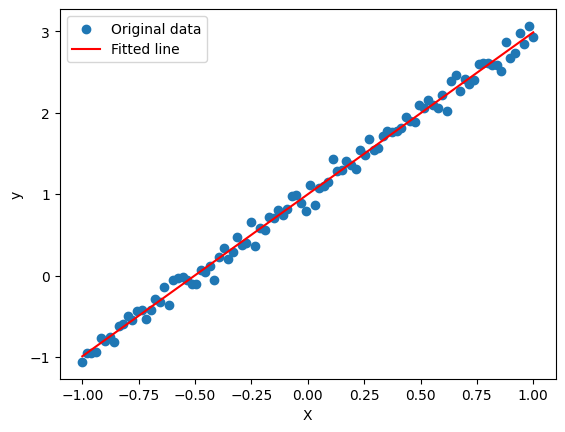

In [27]:
plt.scatter(dataset.X.numpy(), dataset.y.numpy(), label='Original data')
with torch.no_grad():
    predicted = model(dataset.X).numpy()
plt.plot(dataset.X.numpy(), predicted, label='Fitted line', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()